In [1]:
import sympy as sm
import sympy.physics.mechanics as me
from pydy.system import System
import numpy as np
from sympy.simplify.fu import TR2
import matplotlib.pyplot as plt
from scipy.integrate import odeint
me.init_vprinting()

from IPython.display import Latex, display
def print_answer(x, x_res):
    for xi, xri in zip(x, x_res):
        display(Latex(sm.latex(sm.Eq(xi, xri), mode='inline')))

In [2]:
N = me.ReferenceFrame('N')

q1, q2, q3, q4, q5, q6, q7, q8 = me.dynamicsymbols('q1:9')

A2 = N.orientnew('A_2', 'Axis', [q3, N.z])
A1 = A2.orientnew('A_1', 'Axis', [q4, A2.z])

B1 = A1.orientnew('B_1', 'Axis', [q5, A1.y])
B2 = A1.orientnew('B_2', 'Axis', [q6, A1.y])
B3 = A2.orientnew('B_3', 'Axis', [q7, A2.y])
B4 = A2.orientnew('B_4', 'Axis', [q8, A2.y])

t = me.dynamicsymbols._t

In [3]:
O = me.Point('O') # fixed point in the inertial reference frame
O.set_vel(N, 0)

In [4]:
L, l , a, b, r1, r2 = sm.symbols('L, l , a, b, r_1, r_2')

In [5]:
Q = O.locatenew('Q', q1 * N.x + q2 * N.y)

In [6]:
P = Q.locatenew('P', L * -A2.x)

In [7]:
C = P.locatenew('C', l * A2.x)

In [8]:
Q.set_vel(N, Q.pos_from(O).dt(N))
Q.vel(N)

In [9]:
P.v2pt_theory(Q, N, A2)
P.vel(N)

In [10]:
C.v2pt_theory(P, N, A2)
# C.vel(N)

In [11]:
A1.ang_vel_in(A2).express(A1)

In [12]:
u1, u2 = me.dynamicsymbols('u_1:3')

In [13]:
z1 = sm.Eq(u1, A1.ang_vel_in(A2).dot(A1.z))
z2 = sm.Eq(u2, Q.vel(N).dot(A1.x))

In [14]:
u = sm.trigsimp(sm.solve([z1, z2], A1.ang_vel_in(A2).dot(A1.z), Q.vel(N).dot(A1.x)))
u

In [15]:
B1_center = Q.locatenew('B_1_center', a * A1.y)
B1_center.pos_from(Q)

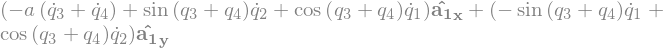

In [16]:
B1_center.v2pt_theory(Q, N, A1)
B1_center.vel(N).express(A1).simplify()

In [17]:
B1_ground = B1_center.locatenew('B_1_ground', r1 * -A1.z)
B1_ground.pos_from(B1_center)

In [18]:
B1_ground.v2pt_theory(B1_center, N, B1)
B1_ground.vel(N).simplify()

In [19]:
B1_cons = [me.dot(B1_ground.vel(N).simplify(), uv) for uv in A1]
for i in range(len(B1_cons)):
    display(sm.trigsimp(B1_cons[i]))

In [20]:
eq1 = sm.Eq(B1_cons[0].simplify().subs(u), 0)
eq1

In [21]:
eq2 = sm.Eq(B1_cons[1].simplify().subs(u), 0)
eq2

In [22]:
B2_center = Q.locatenew('B_1_center', a * -A1.y)
B2_center.pos_from(Q)

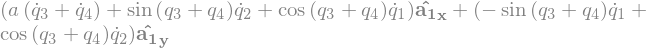

In [23]:
B2_center.v2pt_theory(Q, N, A1)
B2_center.vel(N).express(A1).simplify()

In [24]:
B2_ground = B2_center.locatenew('B_2_ground', r1 * -A1.z)
B2_ground.pos_from(B2_center)

In [25]:
B2_ground.v2pt_theory(B2_center, N, B2)
B2_ground.vel(N).simplify()

In [26]:
B2_cons = [me.dot(B2_ground.vel(N).simplify(), uv) for uv in A1]
for i in range(len(B2_cons)):
    display(sm.trigsimp(B2_cons[i]))

In [27]:
eq3 = sm.Eq(B2_cons[0].simplify().subs(u), 0)
eq3

In [28]:
eq4 = sm.Eq(B2_cons[1].simplify().subs(u), 0)
eq4

In [29]:
B3_center = P.locatenew('B_3_center', b * A2.y)
B3_center.pos_from(P)

In [30]:
B3_center.v2pt_theory(P, N, A2)
B3_center.vel(N).express(A2).simplify()

In [31]:
B3_ground = B3_center.locatenew('B_3_ground', r2 * -A2.z)
B3_ground.pos_from(B3_center)

In [32]:
B3_ground.v2pt_theory(B3_center, N, B3)
B3_ground.vel(N).simplify()

In [33]:
B3_cons = [me.dot(B3_ground.vel(N).simplify(), uv) for uv in A2]
for i in range(len(B3_cons)):
    display(sm.trigsimp(B3_cons[i]))

In [34]:
eq5 = sm.Eq(B3_cons[0].simplify().subs(u), 0)
eq5

In [35]:
eq6 = sm.Eq(B3_cons[1].simplify().subs(u), 0)
eq6

In [36]:
B4_center = P.locatenew('B_4_center', b * -A2.y)
B4_center.pos_from(P)

In [37]:
B4_center.v2pt_theory(P, N, A2)
B4_center.vel(N).express(A2).simplify()

In [38]:
B4_ground = B4_center.locatenew('B_4_ground', r2 * -A2.z)
B4_ground.pos_from(B4_center)

In [39]:
B4_ground.v2pt_theory(B4_center, N, B4)
B4_ground.vel(N).simplify()

In [40]:
B4_cons = [me.dot(B4_ground.vel(N).simplify(), uv) for uv in A2]
for i in range(len(B4_cons)):
    display(sm.trigsimp(B4_cons[i]))

In [41]:
eq7 = sm.Eq(B4_cons[0].simplify().subs(u), 0)
eq7

In [42]:
eq8 = sm.Eq(B4_cons[1].simplify().subs(u), 0)
eq8

In [43]:
eq9 = sm.Eq(A1.ang_vel_in(A2).dot(A1.z), u1)
eq9

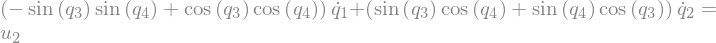

In [44]:
eq10 = sm.Eq(Q.vel(N).dot(A1.x), u2)
eq10

In [45]:
solution = sm.linsolve([eq1, eq2, eq3, eq5, eq6, eq7, eq9, eq10], q1.diff(), q2.diff(), q3.diff(),  q4.diff(), q5.diff(), q6.diff(), q7.diff(), q8.diff())

In [46]:
sollist_keys = [q1.diff(), q2.diff(), q3.diff(),  q4.diff(), q5.diff(), q6.diff(), q7.diff(), q8.diff()]
sollist_keys

In [47]:
sollist_values = list(solution.args[0])

In [48]:
sollist_values_simple = []
for i in range(len(sollist_values)):
    sollist_values_simple.append(sm.factor(TR2(sollist_values[i]).simplify()))

In [49]:
soldict = dict(zip(sollist_keys, sollist_values_simple))
print_answer(sollist_keys, sollist_values_simple)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [50]:
N_v_Q = Q.vel(N).subs(soldict).express(A1).simplify()
N_v_Q

In [51]:
N_v_P = P.vel(N).subs(soldict).express(A2).simplify()
N_v_P

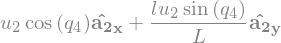

In [52]:
N_v_C = C.vel(N).subs(soldict).express(A2).simplify()
N_v_C

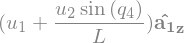

In [53]:
N_w_A1 = A1.ang_vel_in(N).subs(soldict).express(A1).simplify()
N_w_A1

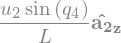

In [54]:
N_w_A2 = A2.ang_vel_in(N).subs(soldict).express(A2).simplify()
N_w_A2

In [55]:
V_1_Q = N_v_Q.diff(u1, N)
V_1_Q

In [56]:
V_2_Q = N_v_Q.diff(u2, N)
V_2_Q

In [57]:
V_1_C = N_v_C.diff(u1, N)
V_1_C

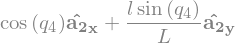

In [58]:
V_2_C = N_v_C.diff(u2, N)
V_2_C

In [59]:
V_1_P = N_v_P.diff(u1, N)
V_1_P

In [60]:
V_2_P = N_v_P.diff(u2, N)
V_2_P

In [61]:
w_1_A1 = N_w_A1.diff(u1, N)
w_1_A1

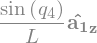

In [62]:
w_2_A1 = N_w_A1.diff(u2, N)
w_2_A1

In [63]:
w_1_A2 = N_w_A2.diff(u1, N)
w_1_A2

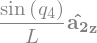

In [64]:
w_2_A2 = N_w_A2.diff(u2, N)
w_2_A2

In [65]:
a_1__P, a_2__P, a_3__P, a_1__C, a_2__C, a_3__C, a__Q, alpha__A1, alpha__A2 = sm.symbols('a_1__P, a_2__P, a_3__P, a_1__C, a_2__C, a_3__C, a__Q, alpha__A1, alpha__A2')

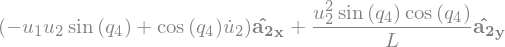

In [66]:
N_a_P = N_v_P.dt(N).subs(soldict)
N_a_P

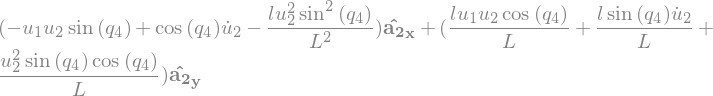

In [67]:
N_a_C = N_v_C.dt(N).subs(soldict)
N_a_C

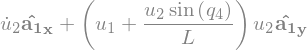

In [68]:
N_a_Q = N_v_Q.dt(N).subs(soldict)
N_a_Q

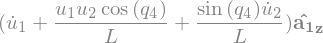

In [69]:
N_aa_A1 = N_w_A1.dt(N).subs(soldict)
N_aa_A1

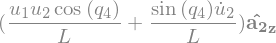

In [70]:
N_aa_A2 = N_w_A2.dt(N).subs(soldict)
N_aa_A2

In [71]:
M1, M2 = sm.symbols('M_1, M_2')
m = me.dynamicsymbols('m')

In [72]:
I1x, I1y, I1z = sm.symbols('I_{1_x}, I_{1_y}, I_{1_z}')
I2x, I2y, I2z = sm.symbols('I_{2_x}, I_{2_y}, I_{2_z}')
J1, J2 = sm.symbols('J_1, J_2')

In [73]:
I1 = me.inertia(A1, I1x, I1y, I1z)
I1

In [74]:
I2 = me.inertia(A2, I2x, I2y, I2z)
I2

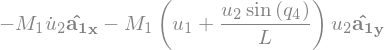

In [75]:
Fstar_G1 = -M1 * N_a_Q
Fstar_G1

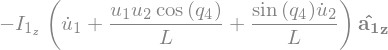

In [76]:
Tstar_G1 = -(N_aa_A1.dot(I1) + me.cross(N_w_A1, I1.dot(N_w_A1)))
Tstar_G1

In [77]:
Fstar_1_G1_R = V_1_Q.dot(Fstar_G1) + w_1_A1.dot(Tstar_G1).subs(soldict)
Fstar_1_G1_R.subs({N_w_A1.dt(N).subs(soldict).dot(A1.z): alpha__A1})

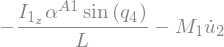

In [78]:
Fstar_2_G1_R = V_2_Q.dot(Fstar_G1) + w_2_A1.dot(Tstar_G1).subs(soldict)
Fstar_2_G1_R.subs({N_w_A1.dt(N).subs(soldict).dot(A1.z): alpha__A1})

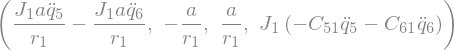

In [79]:
# C_kr
C51, C61 = sm.symbols('C_51, C_61')
C_51 = soldict[q5.diff()].diff(u1)
C_61 = soldict[q6.diff()].diff(u1)
Fstar_1_G1_I = -J1 * (N_w_A1.dot(q5.diff().diff() * A1.y + q5.diff()*(N_w_A1.dot(A1.x)*A1.z - N_w_A1.dot(A1.z)*A1.x)) + C_51 * (N_w_A1.dot(A1.y).diff() + q5.diff().diff())) \
               -J1 * (N_w_A1.dot(q6.diff().diff() * A1.y + q6.diff()*(N_w_A1.dot(A1.x)*A1.z - N_w_A1.dot(A1.z)*A1.x)) + C_61 * (N_w_A1.dot(A1.y).diff() + q6.diff().diff()))   # B1 \ B2

Fstar_1_G1_I, C_51, C_61, Fstar_1_G1_I.subs({-C_51: -C51, -C_61: -C61}).simplify()

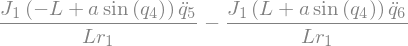

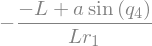

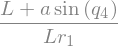

In [80]:
# C_kr
C52, C62 = sm.symbols('C_52, C_62')
C_52 = soldict[q5.diff()].diff(u2)
C_62 = soldict[q6.diff()].diff(u2)
Fstar_2_G1_I = -J1 * (N_w_A1.dot(q5.diff().diff() * A1.y + q5.diff()*(N_w_A1.dot(A1.x)*A1.z - N_w_A1.dot(A1.z)*A1.x)) + C_52 * (N_w_A1.dot(A1.y).diff() + q5.diff().diff())) \
               -J1 * (N_w_A1.dot(q6.diff().diff() * A1.y + q6.diff()*(N_w_A1.dot(A1.x)*A1.z - N_w_A1.dot(A1.z)*A1.x)) + C_62 * (N_w_A1.dot(A1.y).diff() + q6.diff().diff()))   # B1 \ B2

display(Fstar_2_G1_I),
display(C_52)
display(C_62)
display(Fstar_2_G1_I.subs({-C_52: -C52, -C_62: -C62}).simplify())

In [81]:
Fstar_1_G1 = Fstar_1_G1_R + Fstar_1_G1_I
Fstar_1_G1.subs({N_w_A1.dt(N).subs(soldict).dot(A1.z): alpha__A1}).subs({-C_51: -C51, -C_61: -C61}).simplify()

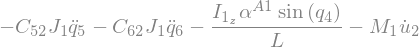

In [82]:
Fstar_2_G1 = Fstar_2_G1_R + Fstar_2_G1_I
Fstar_2_G1.subs({N_w_A1.dt(N).subs(soldict).dot(A1.z): alpha__A1}).subs({-C_52: -C52, -C_62: -C62}).simplify()

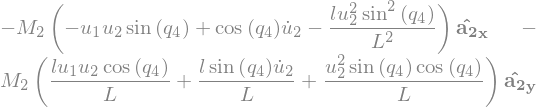

In [83]:
Fstar_G2 = -M2 * N_a_C
Fstar_G2

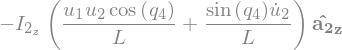

In [84]:
Tstar_G2 = -(N_aa_A2.dot(I2) + me.cross(N_w_A2, I2.dot(N_w_A2)))
Tstar_G2

In [85]:
Fstar_1_G2_R = V_1_C.dot(Fstar_G2) + w_1_A2.dot(Tstar_G2).subs(soldict)
Fstar_1_G2_R.subs({N_w_A2.dt(N).subs(soldict).dot(A2.z): alpha__A2})

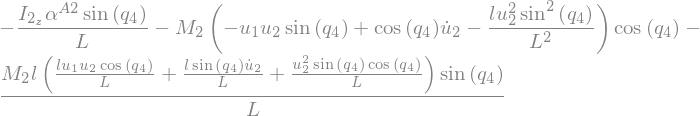

In [86]:
Fstar_2_G2_R = V_2_C.dot(Fstar_G2) + w_2_A1.dot(Tstar_G2).subs(soldict)
Fstar_2_G2_R.subs({N_w_A2.dt(N).subs(soldict).dot(A2.z): alpha__A2})

In [87]:
# C_kr
C71, C81 = sm.symbols('C_71, C_81')
C_71 = soldict[q7.diff()].diff(u1)
C_81 = soldict[q8.diff()].diff(u1)
Fstar_1_G2_I = -J2 * (N_w_A2.dot(q7.diff().diff() * A2.y + q7.diff()*(N_w_A2.dot(A2.x)*A2.z - N_w_A2.dot(A2.z)*A2.x)) + C_71 * (N_w_A2.dot(A2.y).diff() + q7.diff().diff())) \
               -J2 * (N_w_A2.dot(q8.diff().diff() * A2.y + q8.diff()*(N_w_A2.dot(A2.x)*A2.z - N_w_A2.dot(A2.z)*A2.x)) + C_81 * (N_w_A2.dot(A2.y).diff() + q8.diff().diff()))   # B1 \ B2

Fstar_1_G2_I, C_71, C_81, # Fstar_1_G2_I.subs({-C_71: -C71, -C_81: -C81}).simplify()

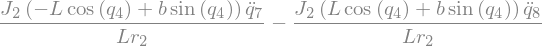

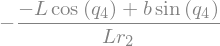

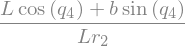

In [88]:
# C_kr
C72, C82 = sm.symbols('C_72, C_82')
C_72 = soldict[q7.diff()].diff(u2)
C_82 = soldict[q8.diff()].diff(u2)
Fstar_2_G2_I = -J2 * (N_w_A2.dot(q7.diff().diff() * A2.y + q7.diff()*(N_w_A2.dot(A2.x)*A2.z - N_w_A2.dot(A2.z)*A2.x)) + C_72 * (N_w_A2.dot(A2.y).diff() + q7.diff().diff())) \
               -J2 * (N_w_A2.dot(q8.diff().diff() * A2.y + q8.diff()*(N_w_A2.dot(A2.x)*A2.z - N_w_A2.dot(A2.z)*A2.x)) + C_82 * (N_w_A2.dot(A2.y).diff() + q8.diff().diff()))   # B1 \ B2

display(Fstar_2_G2_I)
display(C_72)
display(C_82)
display(Fstar_2_G2_I.subs({-C_72: -C72, -C_82: -C82}).simplify())

In [89]:
Fstar_1_G2 = Fstar_1_G2_R + Fstar_1_G2_I
# Fstar_1_G2.subs({N_w_A2.dt(N).subs(soldict).dot(A2.z): alpha__A2}) # .subs({-C_71: -C71, -C_81: -C81}).simplify()
Fstar_1_G2 = 0

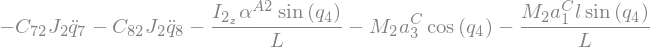

In [90]:
Fstar_2_G2 = Fstar_2_G2_R + Fstar_2_G2_I
Fstar_2_G2.subs({N_w_A2.dt(N).subs(soldict).dot(A2.z): alpha__A2}).subs({N_v_C.dt(N).subs(soldict).dot(A2.x): a_3__C}).subs({N_v_C.dt(N).subs(soldict).dot(A2.y): a_1__C}).subs({-C_72: -C72, -C_82: -C82}).simplify()

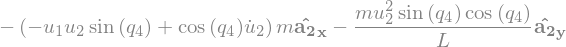

In [91]:
Fstar_P = -m * N_a_P
Fstar_P

In [92]:
Fstar_1_P_R = V_1_P.dot(Fstar_P)
Fstar_1_P_R

In [93]:
Fstar_2_P_R = V_2_P.dot(Fstar_P)
Fstar_2_P_R

In [94]:
Fstar_1_P = Fstar_1_P_R
Fstar_1_P

In [95]:
Fstar_2_P = Fstar_2_P_R
Fstar_2_P.subs({N_v_P.dt(N).subs(soldict).dot(A2.x): a_3__P}).subs({N_v_P.dt(N).subs(soldict).dot(A2.y): a_1__P}).simplify()

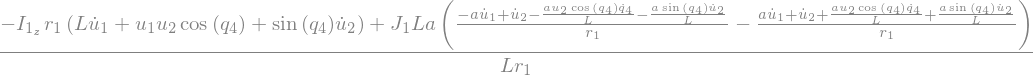

In [96]:
Fstar_1 = Fstar_1_G1 + Fstar_1_G2 + Fstar_1_P
Fstar_1.subs(soldict).simplify()

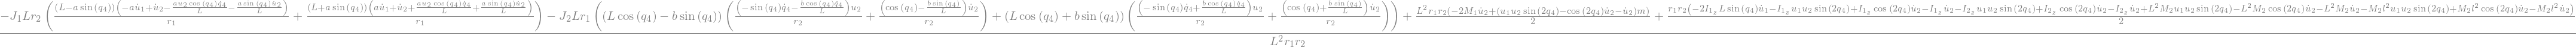

In [97]:
Fstar_2 = Fstar_2_G1 + Fstar_2_G2 + Fstar_2_P
Fstar_2.subs(soldict).simplify()

In [98]:
C = me.dynamicsymbols('C')
C_t = -C*A2.x
C_t

In [99]:
Fprime_1 = V_1_P.dot(C_t)*m.diff()
Fprime_1

In [100]:
Fprime_2 = V_2_P.dot(C_t)*m.diff()
Fprime_2

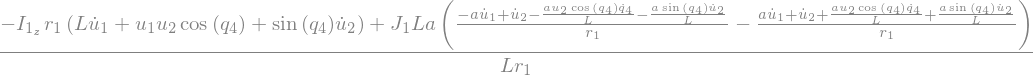

In [101]:
kane_1 = Fstar_1.simplify() + Fprime_1.simplify()
kane_1.subs(soldict).simplify()

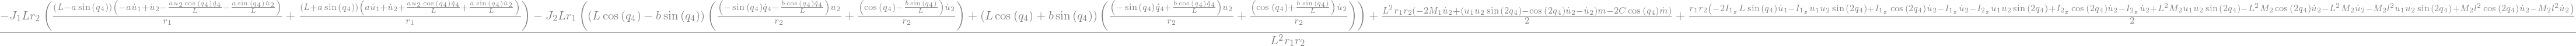

In [102]:
kane_2 = Fstar_2 + Fprime_2
kane_2.subs(soldict).simplify()

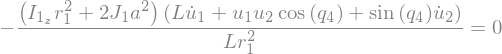

In [103]:
kane_1_eq = sm.Eq(kane_1.simplify().subs(soldict).simplify().subs(u).simplify(), 0)
kane_1_eq

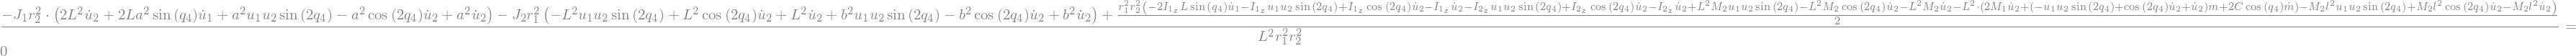

In [104]:
kane_2_eq = sm.Eq(kane_2.simplify().subs(soldict).simplify().subs(u).simplify(), 0)
kane_2_eq